# TERM DEPOSIT MARKETING PREDICTION

## Attributes Information

Attributes:

**age** : age of customer (numeric)

**job** : type of job (categorical)

**marital** : marital status (categorical)

**education** (categorical)

**default**: has credit in default? (binary)

**balance**: average yearly balance, in euros (numeric)

**housing**: has a housing loan? (binary)

**loan**: has personal loan? (binary)

**contact**: contact communication type (categorical)

**day**: last contact day of the month (numeric)

**month**: last contact month of year (categorical)

**duration**: last contact duration, in seconds (numeric)

**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

**y** - has the client subscribed to a term deposit? (binary)

## LIBRARY DEFINITIONS

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix as cm
from sklearn.metrics import mean_squared_error, mean_absolute_error, cohen_kappa_score, matthews_corrcoef
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go

In [2]:
%matplotlib inline

## DATA PREPARATION

In [3]:
df = pd.read_csv("term-deposit-marketing-2020.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [5]:
# Some windows versions raise error because of not installed missigno.
# pip install missingno --user
# import missingno as msgno
# msgno.matrix(df)
# Show data beautifuly
# pip install plotly --user

### Describe Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
age          40000 non-null int64
job          40000 non-null object
marital      40000 non-null object
education    40000 non-null object
default      40000 non-null object
balance      40000 non-null int64
housing      40000 non-null object
loan         40000 non-null object
contact      40000 non-null object
day          40000 non-null int64
month        40000 non-null object
duration     40000 non-null int64
campaign     40000 non-null int64
y            40000 non-null object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [7]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [8]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


### Continuous Variables

In [9]:
continous_vars=df.describe().columns
for var in continous_vars:
    print(var)

age
balance
day
duration
campaign


### Categorical Variables

In [10]:
categorical_vars=df.describe(include=[object]).columns
for cat_var in categorical_vars:
    print(cat_var)

job
marital
education
default
housing
loan
contact
month
y


### Continuous Variables Visualization

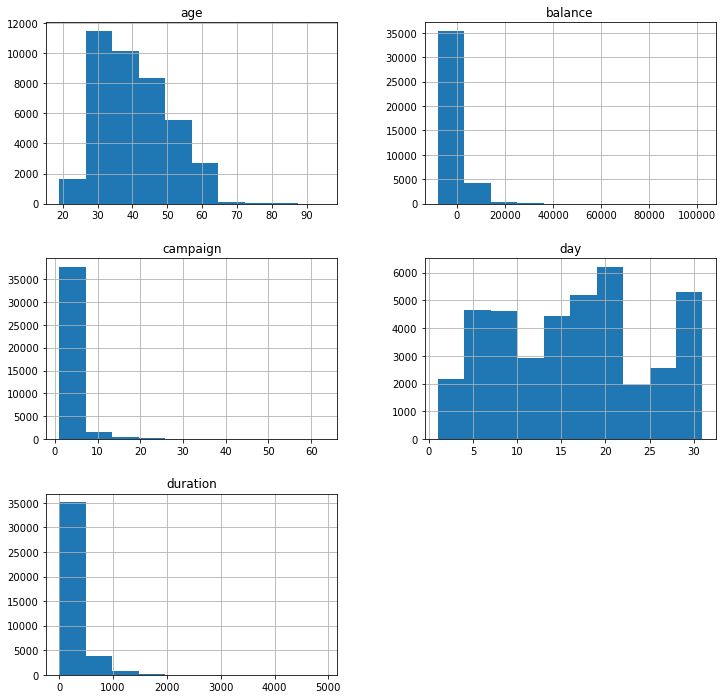

In [11]:
df.hist(column=continous_vars, figsize=(12,12))
plt.show()

### Categorical Variables Visualization

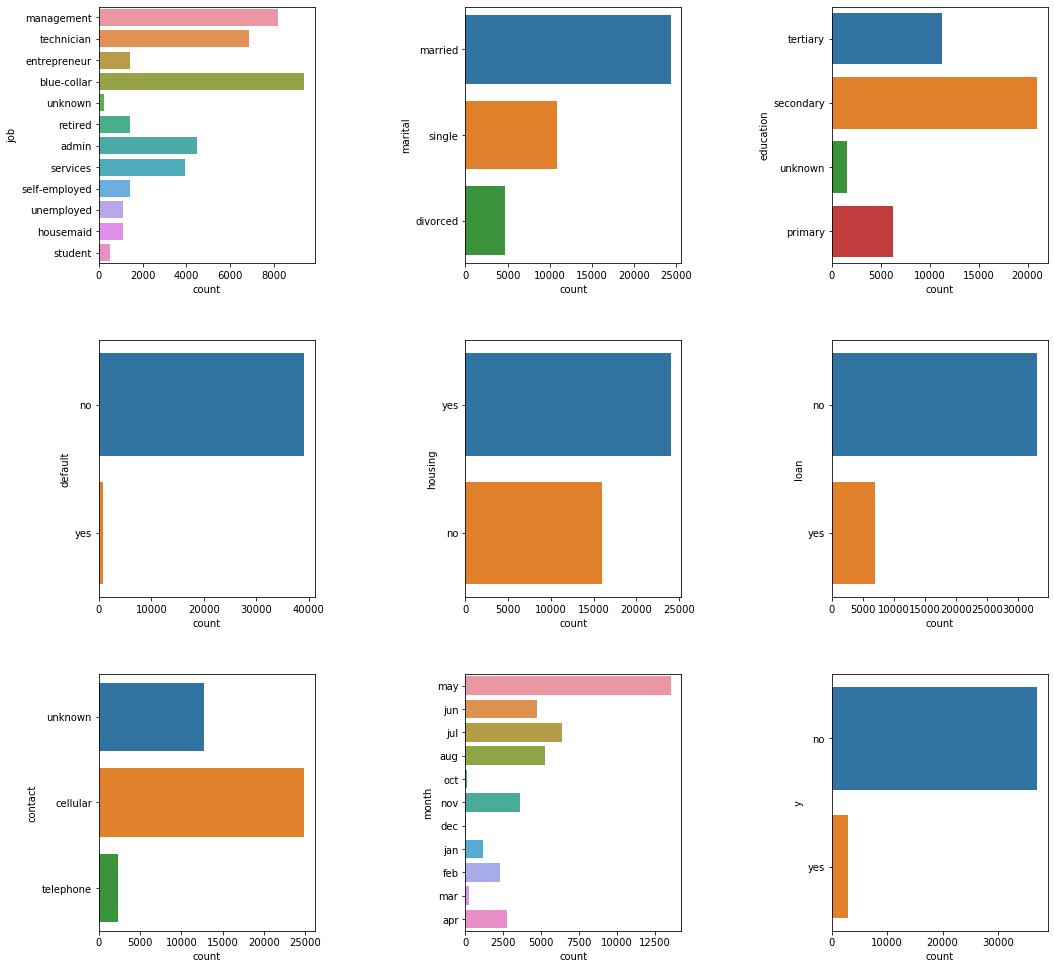

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(17, 17))
plt.subplots_adjust(wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)
    
plt.show()

## DATA MANIPULATION

### Correlation Matrix

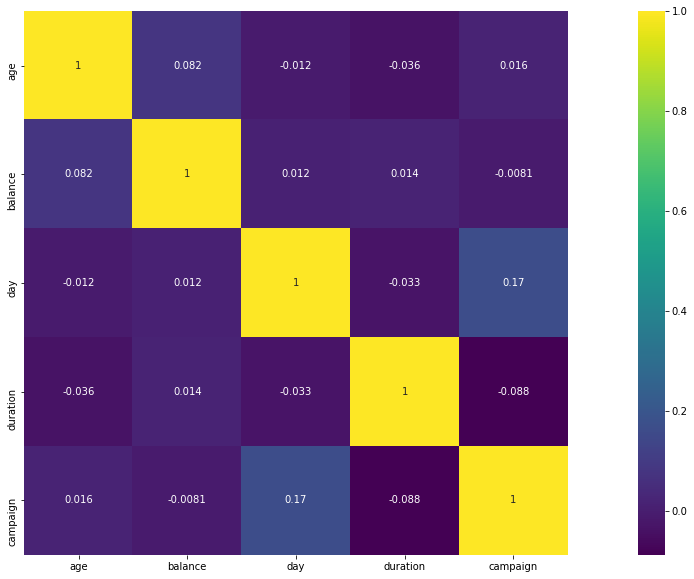

In [13]:
correlation=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True, cmap="viridis")
plt.show()

> There is no correlation between variables

### One-Hot Encoding

In [14]:
columns = df.select_dtypes(include=[object]).columns
df = pd.concat([df, pd.get_dummies(df[columns])], axis=1)
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day', 'y','duration'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 44 columns):
age                    40000 non-null int64
balance                40000 non-null int64
campaign               40000 non-null int64
job_admin              40000 non-null uint8
job_blue-collar        40000 non-null uint8
job_entrepreneur       40000 non-null uint8
job_housemaid          40000 non-null uint8
job_management         40000 non-null uint8
job_retired            40000 non-null uint8
job_self-employed      40000 non-null uint8
job_services           40000 non-null uint8
job_student            40000 non-null uint8
job_technician         40000 non-null uint8
job_unemployed         40000 non-null uint8
job_unknown            40000 non-null uint8
marital_divorced       40000 non-null uint8
marital_married        40000 non-null uint8
marital_single         40000 non-null uint8
education_primary      40000 non-null uint8
education_secondary    40000 non-null uint8
education_t

### Data Normalization

In [16]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)

In [17]:
y = data_scaled.y_yes
data_scaled = data_scaled.drop(['y_yes','y_no'], axis = 1)

### Test and Train

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=52)

### Imbalanced Data

In [19]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all [df_all.value==1]

    df_minority_upsampled = resample(df_minority, 
                                     replace=True, 
                                     n_samples=df_majority.shape[0], 
                                     random_state=123)
 
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

### Logistic Regression

In [20]:
X_train,y_train=upSample(X_train, y_train)

In [21]:
lr = LogisticRegression(random_state = 52, solver='lbfgs', max_iter=10000)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
print("***Classification Report***\n")
print(classification_report(y_test, prediction))

***Classification Report***

              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78      7422
         1.0       0.12      0.59      0.20       578

    accuracy                           0.66      8000
   macro avg       0.54      0.62      0.49      8000
weighted avg       0.89      0.66      0.74      8000



### CONFUSION MATRIX

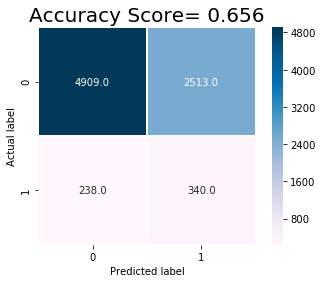

In [22]:
score = round(accuracy_score(y_test, prediction),3) 
cm0 = cm(y_test, prediction)
sns.heatmap(cm0, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score= {0}'.format(score), size = 20)
plt.show()

### Feature Selection

In [23]:
rfe=RFE(lr,10)
rfe=rfe.fit(X_train,y_train)

print("***Feature Selection***","\n")
print(", ".join([x for x in X_train[X_train.columns[rfe.ranking_==1].values].columns]))

***Feature Selection*** 

age, balance, campaign, contact_unknown, month_aug, month_jan, month_jul, month_mar, month_nov, month_oct


### Cross Validation

In [24]:
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)

print("Accuracy (mean)= %.2f" % (accuracies.mean()*100))
print("Std= %.2f" % (accuracies.std()*100))

Accuracy (mean)= 63.54
Std= 0.40


### Errors

In [25]:
mae = mean_absolute_error(lr.predict(X_test), y_test)
mse = mean_squared_error(lr.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE)= %.2f' % mae)
print('Mean Squared Error (MSE)= %.2f' % mse)
print('Root Mean Squared Error (RMSE)= %.2f' % rmse)

Mean Absolute Error (MAE)= 0.34
Mean Squared Error (MSE)= 0.34
Root Mean Squared Error (RMSE)= 0.59


### Cohen - Matthew Score

In [26]:
print("Cohen Score = %.2f" % cohen_kappa_score(y_test, prediction))
print("Matthew Score = %.2f" % matthews_corrcoef(y_test, prediction))

Cohen Score = 0.09
Matthew Score = 0.13


### K Nearest Neighbors

In [27]:
classifier = KNeighborsClassifier(n_neighbors=100, weights="distance")  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

print("KNN Algorithm")
print("Classification Report")
print(classification_report(y_test, y_pred))

KNN Algorithm
Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82      7422
         1.0       0.12      0.47      0.19       578

    accuracy                           0.71      8000
   macro avg       0.53      0.60      0.51      8000
weighted avg       0.89      0.71      0.78      8000



Confusion Matrix


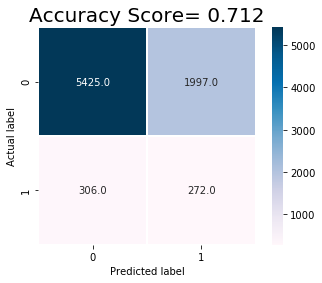

In [28]:
print("Confusion Matrix")
score = round(accuracy_score(y_test, y_pred), 3) 
cm0 = cm(y_test, y_pred)
sns.heatmap(cm0, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score= {0}'.format(score), size = 20)
plt.show()

In [29]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
scores = cross_val_score(classifier, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

print("Accuracy (mean)= %.2f" % (accuracies.mean()*100))
print("std= %.2f" % (accuracies.std()*100))
print ("MAE (mean)= %.2f" , scores.mean())

Accuracy (mean)= 86.28
std= 0.39
MAE (mean)= %.2f -0.13718745999769405


In [30]:
mae = mean_absolute_error(classifier.predict(X_test), y_test)
mse = mean_squared_error(classifier.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE)= %.2f' % mae)
print('Mean Squared Error (MSE)= %.2f' % mse)
print('Root Mean Squared Error (RMSE)= %.2f' % rmse)

Mean Absolute Error (MAE)= 0.29
Mean Squared Error (MSE)= 0.29
Root Mean Squared Error (RMSE)= 0.54


In [31]:
print("Cohen Score=", cohen_kappa_score(y_test, y_pred))
print("Matthew Score=", matthews_corrcoef(y_test, y_pred))

Cohen Score= 0.08579531143595431
Matthew Score= 0.11574898561499525



### Random Forest

In [32]:
rf = RandomForestClassifier(n_estimators=10 ,n_jobs=-1,
                            random_state=42, 
                            max_depth= 5
                            )

rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

print("***Random Forest Algorithm***","\n")
print("***Classification Report***","\n")
print(classification_report(y_test, rf_predict))

***Random Forest Algorithm*** 

***Classification Report*** 

              precision    recall  f1-score   support

         0.0       0.96      0.58      0.72      7422
         1.0       0.11      0.65      0.19       578

    accuracy                           0.59      8000
   macro avg       0.53      0.62      0.45      8000
weighted avg       0.89      0.59      0.68      8000



***Confusion Matrix*** 



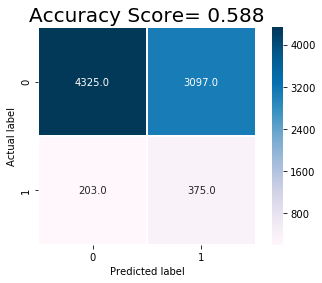

In [33]:
print("***Confusion Matrix***","\n")
score = round(accuracy_score(y_test, rf_predict),3)
cm0 = cm(y_test, rf_predict)
sns.heatmap(cm0, annot=True, fmt=".1f", linewidths=.3, 
            square = True, cmap = 'PuBu')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score= {0}'.format(score), size = 20)
plt.show()

In [34]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10,)

print("Accuracy (mean)= %2.f" % (accuracies.mean()*100))
print("Std= %.2f" % (accuracies.std()*100))
print ("MAE (mean)= %.2f" % scores.mean())

Accuracy (mean)= 64
Std= 0.48
MAE (mean)= -0.36


In [35]:
mae = mean_absolute_error(rf.predict(X_test), y_test)
mse = mean_squared_error(rf.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE)= %.2f' % mae)
print('Mean Squared Error (MSE)= %.2f' % mse)
print('Root Mean Squared Error (RMSE)= %.2f' % rmse)

Mean Absolute Error (MAE)= 0.41
Mean Squared Error (MSE)= 0.41
Root Mean Squared Error (RMSE)= 0.64


In [36]:
print("Cohen Score = %.2f" % cohen_kappa_score(y_test, rf_predict))
print("Matthew Score = %.2f" % matthews_corrcoef(y_test, rf_predict))

Cohen Score = 0.07
Matthew Score = 0.12


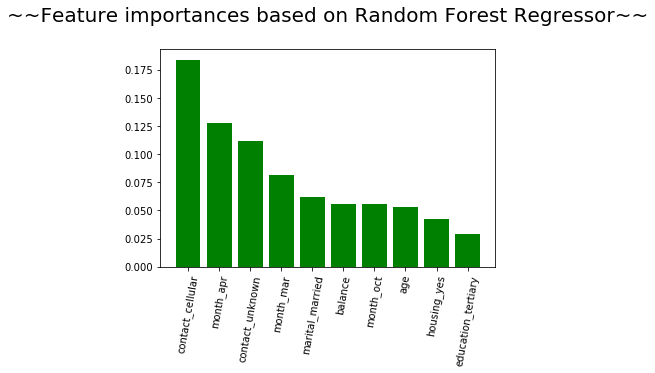

In [38]:
features = np.argsort(rf.feature_importances_)[::-1][:10]
columns = data_scaled.columns
plt.title("~~Feature importances based on Random Forest Regressor~~", y = 1.10, size = 20)
plt.bar(range(len(features)), rf.feature_importances_[features], color="green", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

In [74]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Compare Models</b>','<b>Precision</b>','<b>Recall</b>','<b>F1-score</b>','<b>Accuracy</b>', 
            '<b>Kappa</b>', '<b>Matthew</b>', '<b>MSE</b>' ],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['Logistic Regression', '<b>K Nearest Neighbors</b>', 'Random Forest'],
      [0.89, 0.89, 0.89 ],
      [0.66, 0.71, 0.59],
      [0.74, 0.78, 0.68],
    [0.66, 0.71, 0.59],
    [0.09, 0.08, 0.06],
    [0.13, 0.12, 0.12],
    [0.34, 0.29, 0.64]],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()